In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [2]:
# Usaremos el dataset de dígitos (8x8) de sklearn para facilitar PCA y gráficos
digits = load_digits()
X = digits.data
y = digits.target

# Escalar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [3]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


In [4]:
# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca, y_train)
y_pred_knn = knn.predict(X_test_pca)

# Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_pca, y_train)
y_pred_gb = gb.predict(X_test_pca)


In [5]:
def plot_metrics(y_true, y_pred, title="Métricas"):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average="macro")
    rec = recall_score(y_true, y_pred, average="macro")
    f1 = f1_score(y_true, y_pred, average="macro")
    
    metrics = {"Accuracy": acc, "Precision": prec, "Recall": rec, "F1-score": f1}
    
    plt.figure(figsize=(6,4))
    plt.bar(metrics.keys(), metrics.values(), color="mediumseagreen")
    plt.ylim(0,1)
    plt.title(title)
    for i, v in enumerate(metrics.values()):
        plt.text(i, v + 0.02, f"{v:.2f}", ha="center", fontweight="bold")
    plt.show()
    
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Matriz de Confusión: {title}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()


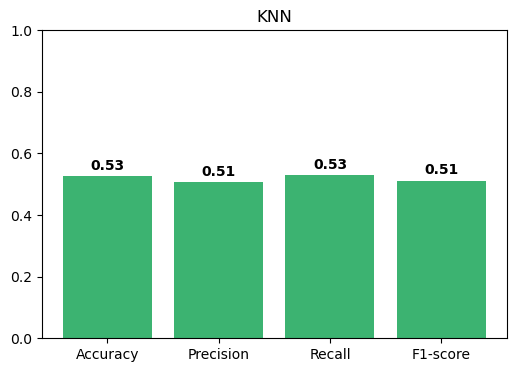

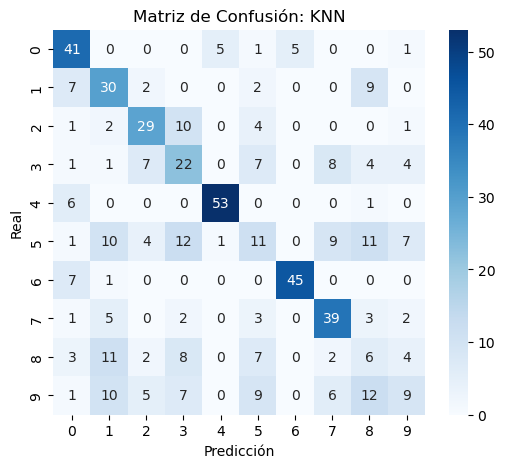

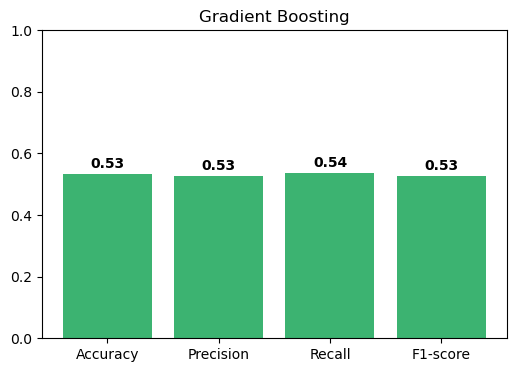

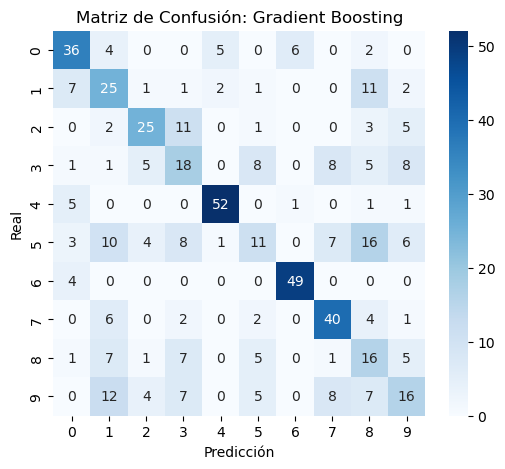

In [6]:
plot_metrics(y_test, y_pred_knn, title="KNN")
plot_metrics(y_test, y_pred_gb, title="Gradient Boosting")


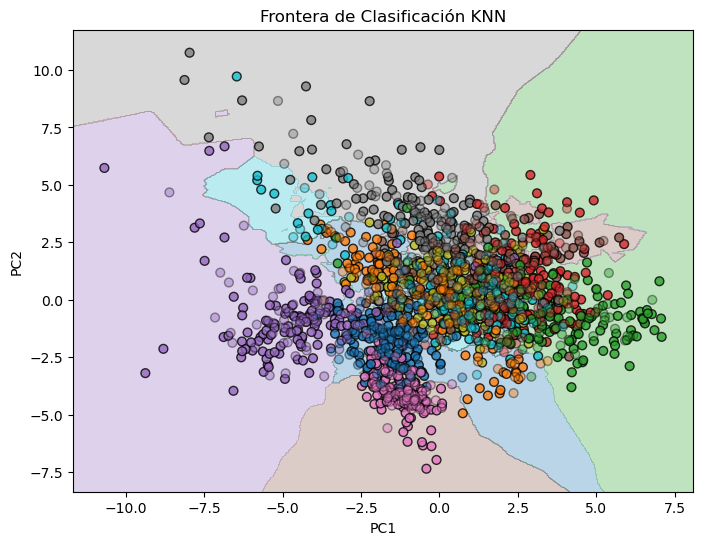

In [7]:
# Malla para frontera KNN
x_min, x_max = X_train_pca[:,0].min()-1, X_train_pca[:,0].max()+1
y_min, y_max = X_train_pca[:,1].min()-1, X_train_pca[:,1].max()+1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
Z_knn = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z_knn, alpha=0.3, cmap="tab10")

# Train y test
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train, cmap="tab10", s=40, alpha=0.8, edgecolor="k")
plt.scatter(X_test_pca[:,0], X_test_pca[:,1], c=y_test, cmap="tab10", s=40, alpha=0.4, edgecolor="k")
plt.title("Frontera de Clasificación KNN")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


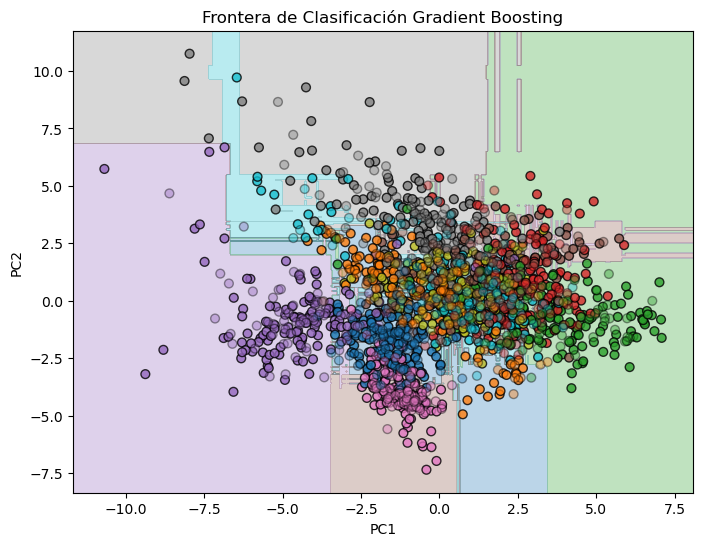

In [8]:
Z_gb = gb.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z_gb, alpha=0.3, cmap="tab10")

# Train y test
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train, cmap="tab10", s=40, alpha=0.8, edgecolor="k")
plt.scatter(X_test_pca[:,0], X_test_pca[:,1], c=y_test, cmap="tab10", s=40, alpha=0.4, edgecolor="k")
plt.title("Frontera de Clasificación Gradient Boosting")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()
